In [18]:
import numpy as np
import pandas as pd
import glob 
import os
pd.options.display.max_columns=50

In [17]:
results = glob.glob('./results/performances/*')
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))   
df = pd.read_csv(list2[-15])
df

,runID,data,num_train,num_valid,num_test,num_select,num_inspected,num_uninspected,num_test_illicit,test_illicit_rate,upper_bound_precision,upper_bound_recall,upper_bound_rev,sampling,initial_inspection_rate,current_inspection_rate,final_inspection_rate,inspection_rate_option,mode,subsamplings,weights,unc_mode,train_start,valid_start,test_start,test_end,numWeek,precision,recall,revenue,norm-precision,norm-recall,norm-revenue,save
0,1601912425,real-t,10856,2929,16134,806,806,15328,1344,0.083302,1.0,0.600223,0.975570,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,15-01-25,15-02-01,15-02-08,1,0.0385,0.0231,0.0098,0.0385,0.0384,0.0101,0
1,1601912425,real-t,13785,806,16332,816,816,15516,1037,0.063495,1.0,0.787464,0.989641,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,15-02-01,15-02-08,15-02-15,2,0.3346,0.2633,0.3950,0.3346,0.3343,0.3991,0
2,1601912425,real-t,14591,816,17474,873,873,16601,1509,0.086357,1.0,0.578993,0.983715,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,15-02-08,15-02-15,15-02-22,3,0.1306,0.0755,0.4240,0.1306,0.1305,0.4310,0
3,1601912425,real-t,15407,873,17302,865,865,16437,1255,0.072535,1.0,0.689323,0.984240,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,15-02-15,15-02-22,15-03-01,4,0.1364,0.0940,0.0471,0.1364,0.1364,0.0479,0
4,1601912425,real-t,16280,865,18687,934,934,17753,1152,0.061647,1.0,0.811068,0.994443,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,15-02-22,15-03-01,15-03-08,5,0.0610,0.0495,0.0466,0.0610,0.0610,0.0469,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1601912425,real-t,94781,1004,18927,946,946,17981,1647,0.087019,1.0,0.574590,0.959147,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,16-11-20,16-11-27,16-12-04,96,0.5793,0.3327,0.5350,0.5793,0.5791,0.5578,0
96,1601912425,real-t,95785,946,14551,727,727,13824,982,0.067487,1.0,0.740886,0.986015,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,16-11-27,16-12-04,16-12-11,97,0.3989,0.2953,0.3054,0.3989,0.3986,0.3098,0
97,1601912425,real-t,96731,727,13332,666,666,12666,902,0.067657,1.0,0.739024,0.987062,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,16-12-04,16-12-11,16-12-18,98,0.4219,0.3115,0.2352,0.4219,0.4215,0.2383,0
98,1601912425,real-t,97458,666,16378,818,818,15560,1293,0.078947,1.0,0.633333,0.979601,xgb,20,5.0,5,direct_decay,scratch,-,-,naive,15-01-01,16-12-11,16-12-18,16-12-25,99,0.6125,0.3875,0.3754,0.6125,0.6118,0.3832,0


### Results of Individual Experiments

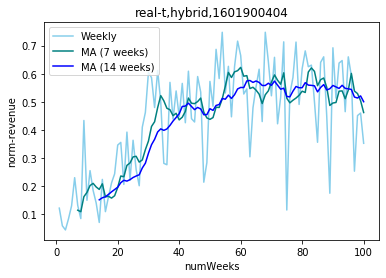

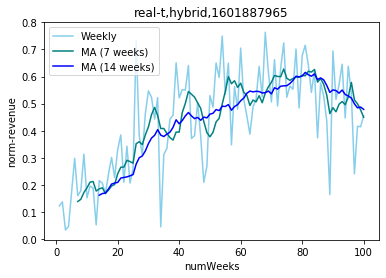

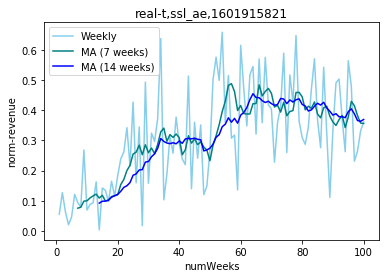

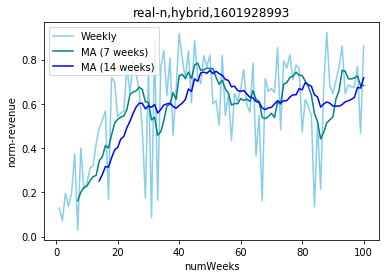

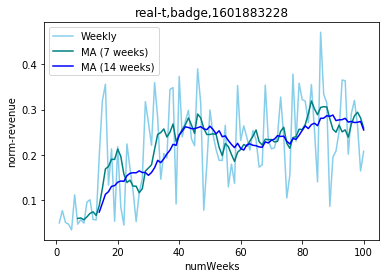

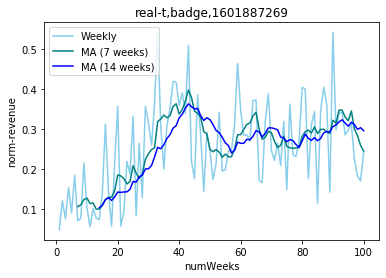

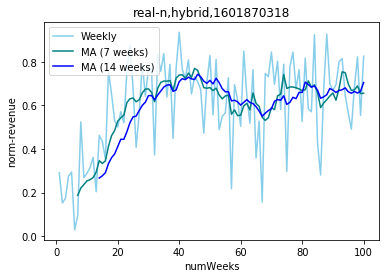

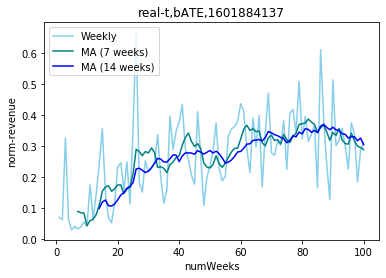

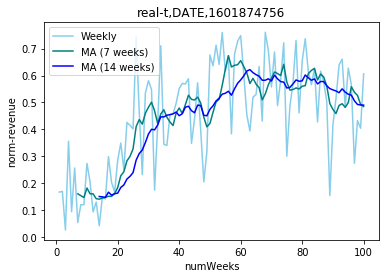

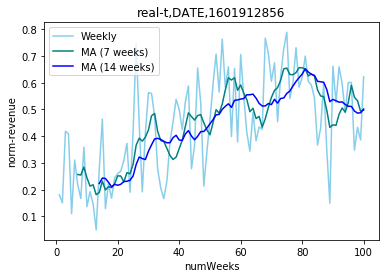

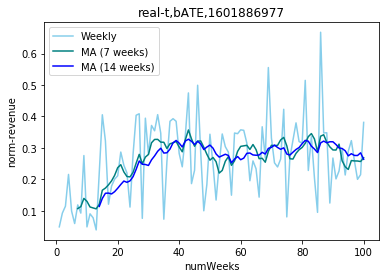

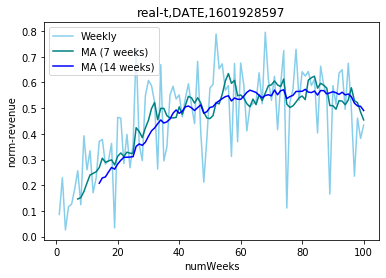

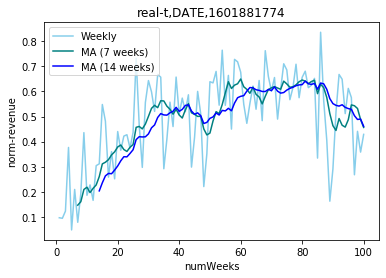

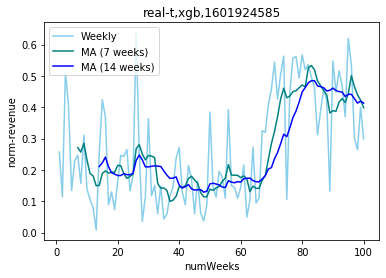

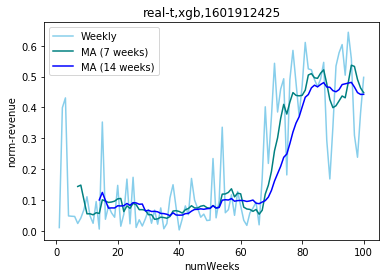

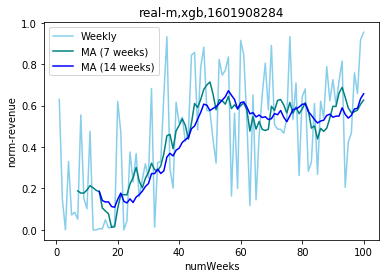

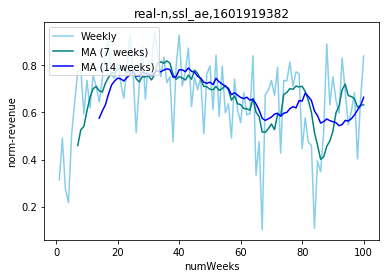

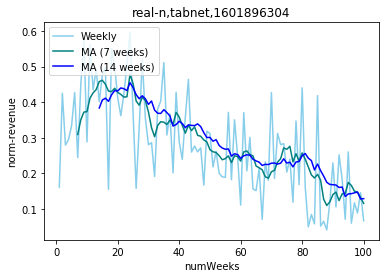

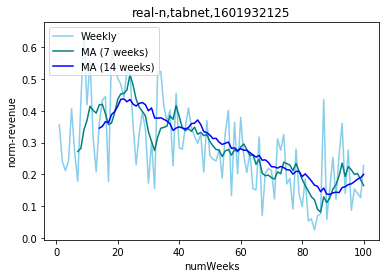

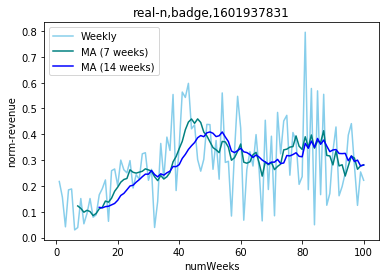

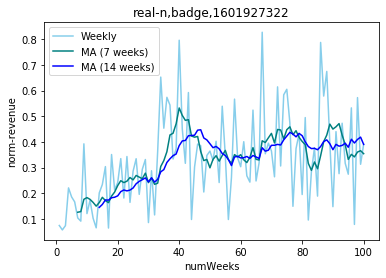

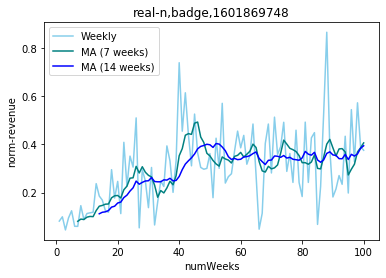

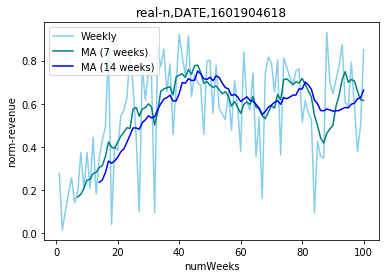

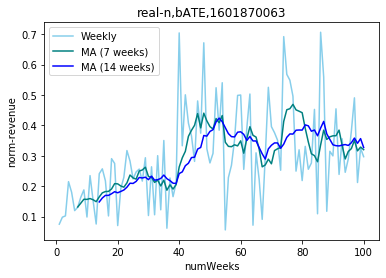

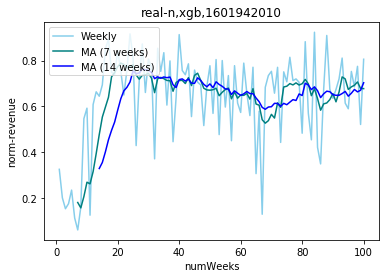

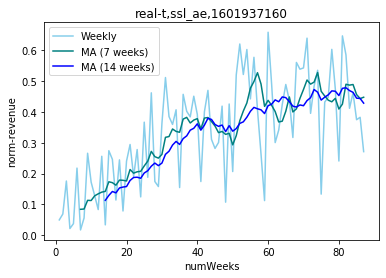

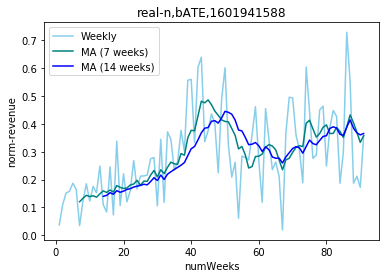

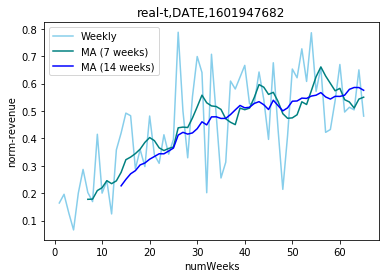

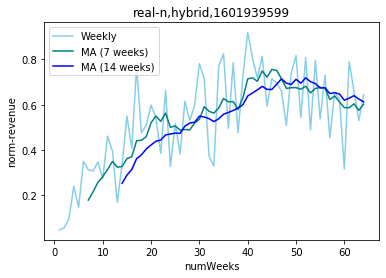

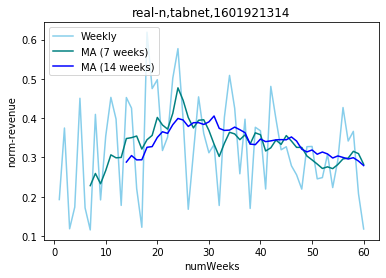

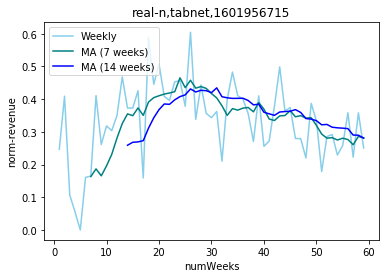

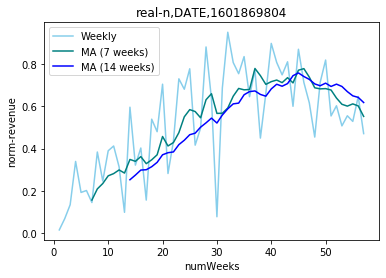

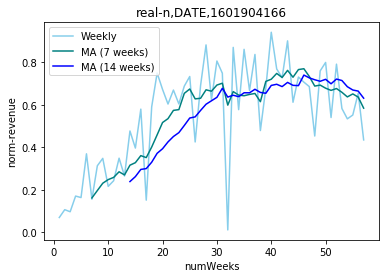

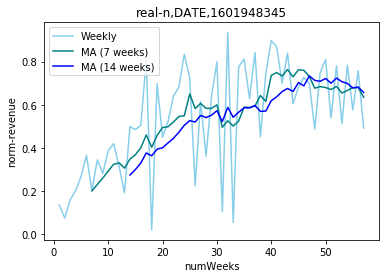

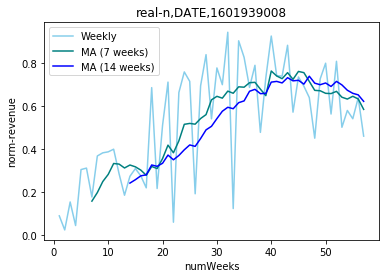

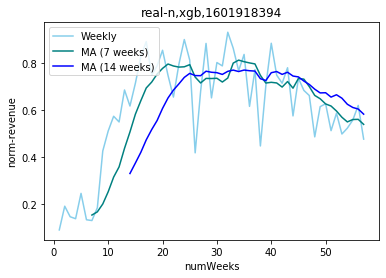

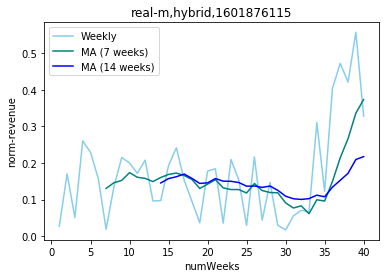

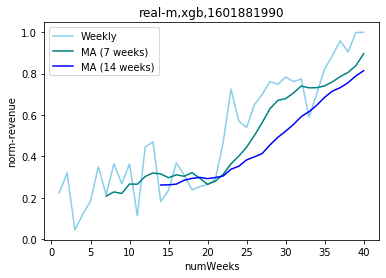

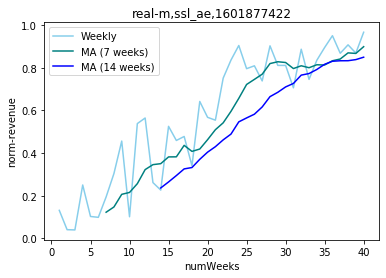

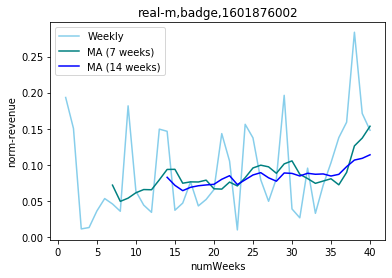

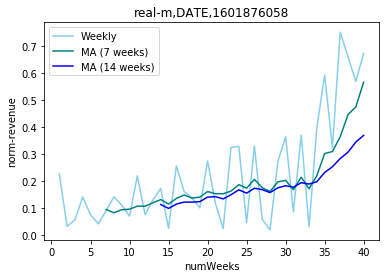

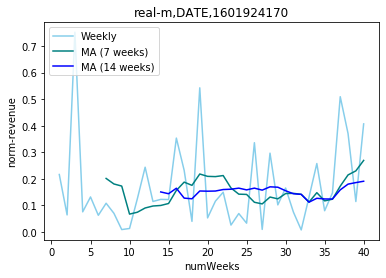

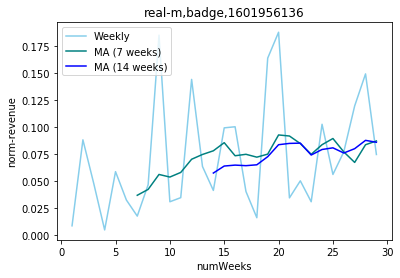

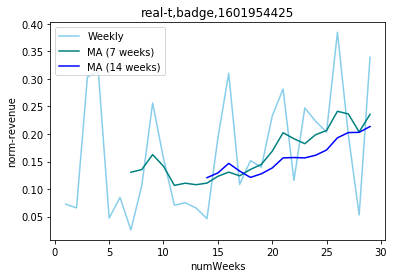

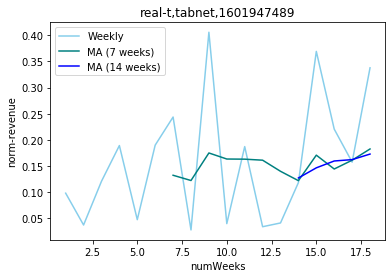

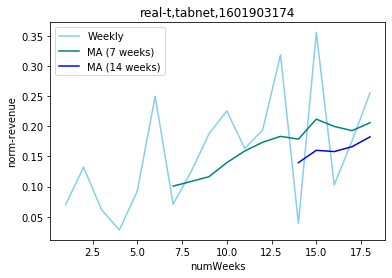

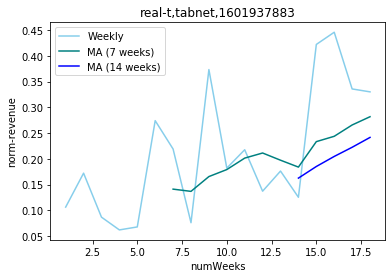

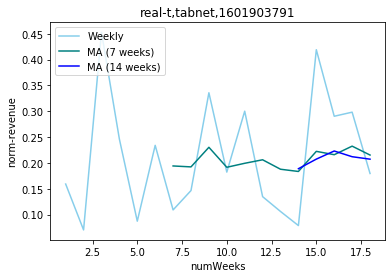

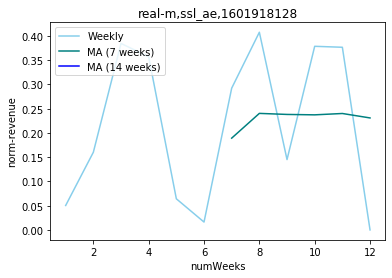

In [20]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
for i in range(1,50):
    df = pd.read_csv(list2[-i])
    var = 'norm-revenue'
    plt.figure()
    rolling_mean7 = df[var].rolling(window=7).mean()
    rolling_mean14 = df[var].rolling(window=14).mean()
    
    filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
    info = ','.join(list(df[['data', 'sampling']].iloc[0]))
    plt.title(info+','+filename)
    plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
    plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
    plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
    plt.legend(loc='upper left')
    plt.ylabel(var)
    plt.xlabel('numWeeks')
    plt.show()
    
    full_results[info].append(rolling_mean14)
    plt.close()

### Tdata Simulation Results

The number of trials for each setting (Results are averaged):
real-t,hybrid 2
real-t,ssl_ae 2
real-t,badge 3
real-t,bATE 2
real-t,DATE 5
real-t,xgb 2
real-t,tabnet 4


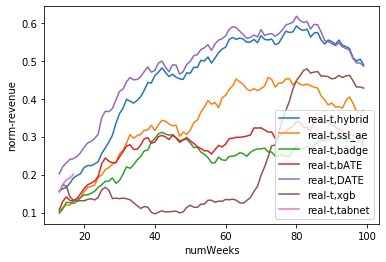

In [21]:
plt.figure()
info = ','.join(list(df[['data', 'sampling']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.show()
full_results[info] = rolling_mean14
plt.close()

### Ndata Simulation Results

The number of trials for each setting (Results are averaged):
real-n,hybrid 3
real-n,ssl_ae 1
real-n,tabnet 4
real-n,badge 3
real-n,DATE 5
real-n,bATE 2
real-n,xgb 2


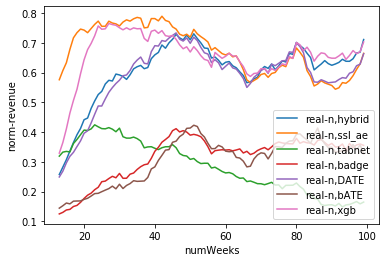

In [23]:
plt.figure()
info = ','.join(list(df[['data', 'sampling']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')

plt.show()
full_results[info] = rolling_mean14
plt.close()